<a href="https://codeimmersives.com"><img src = "https://www.codeimmersives.com/wp-content/uploads/2019/09/CodeImmersives_Logo_RGB_NYC_BW.png" width = 400> </a>


<h1 align=center><font size = 5>Agenda</font></h1>

<h3>You are a consulting firm tasked to examine the hiring practice of a division of a public company.
You are given the HR records of all past and present employees.  A complaint has been filed that this division
discriminates against women and low wage workers.  Examine the data and come up with a conclusion.

<h3>The output should be in a jupyter notebook with the following name:
Lastname_firstname_DATASCIENCE_CAPSTONE_202106
Each answer should have a clear label of what you are answering using markdown</h3>

# SET UP SECTION 
Add your set up directory here

In [460]:
import pandas as pd
df = pd.read_csv('ACTIVE_EMPLOYEES_BY_DEPT.csv')
# TEXT COLOR FOR ALL PLOTS! CHANGE TO YOUR PREFERENCE IF NEEDED
text_color = 'white'
# text_color = 'black'

<h2>Part 1-a</h2>
1 - Import employee file only the gender,salarly grade and dept columns

In [461]:
import pandas as pd
df = pd.read_csv('emp_file_CAPSTONE.txt', usecols=['gender', 'salary', 'sg', 'dept'])
print(df)

    gender  sg    salary  dept
0        F   1    $77582    hr
1        M   1     38136  comp
2        M   4    107483   fin
3        M   7  3X429110  comp
4        M   7  3X646818  proj
..     ...  ..       ...   ...
673      M   6  3X499553   acc
674      M   4    114045    hr
675      M   1     33030  comp
676      M   2     51120  proj
677      M   2     44124  proj

[678 rows x 4 columns]


2 - Fix the column dept capitalize it

In [462]:
df['dept'] = df['dept'].str.capitalize()
print(df.dept.unique())

['Hr' 'Comp' 'Fin' 'Proj' 'Acc' 'I.t.' 'Pub']


3 - Create a dataframe for every salary grade (index) with columns 'male' and 'Female'

In [463]:
# Transpose date into correct orientation
df = pd.crosstab(df['gender'], df['sg']).T
# Rename the index column
df.index.rename('Pay_Grade', inplace=True)
# Set column names and display
df.rename(columns={'F':"Female", 'M':"Male"}, inplace=True)
df=df.astype('float')
df

gender,Female,Male
Pay_Grade,,
1,22.0,65.0
2,26.0,68.0
3,32.0,70.0
4,22.0,81.0
5,34.0,54.0
6,34.0,58.0
7,31.0,81.0


4 - Create pie charts for every Salary Grade with the ratio of men to women

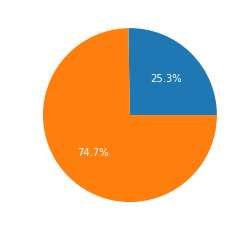

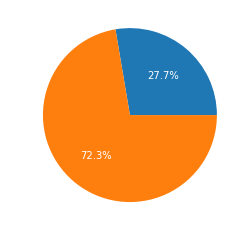

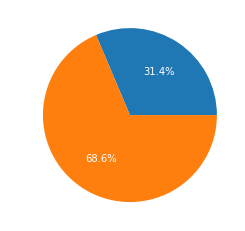

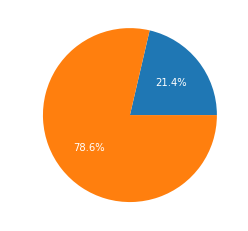

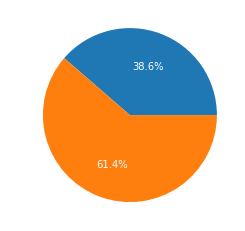

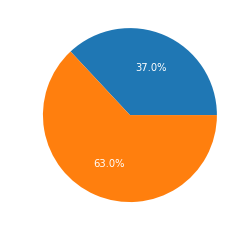

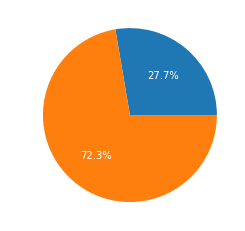

In [464]:
import matplotlib.pyplot as plt
plt.rcParams.update({'text.color': f"{text_color}",
                     'axes.labelcolor': f"{text_color}"})
_=[df.iloc[i-1].plot(kind='pie',subplots=True,ax=plt.subplots(1,1)[1], autopct='%1.1f%%') for i in df.index]

5 - Create a dataframe for every Dept (index) with columns 'Male' and 'Female'

In [465]:
import pandas as pd
df = pd.read_csv('emp_file_CAPSTONE.txt', usecols=['gender','dept'])

# Transpose date into correct orientation
df = pd.crosstab(df['dept'],df['gender'])
# Rename the index column
df.index.rename('Dept', inplace=True)
# Set column names and display
df.rename(columns={'F':"Female", 'M':"Male"}, inplace=True)
df=df.astype('float')


6 - Create pie charts for every Dept with the ratio of men to women

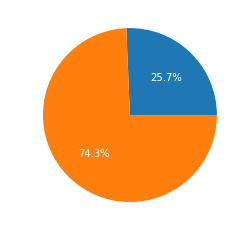

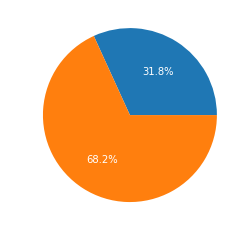

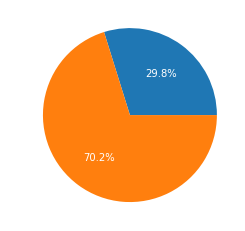

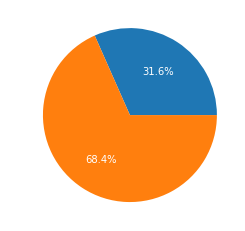

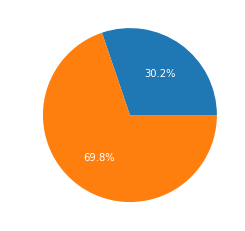

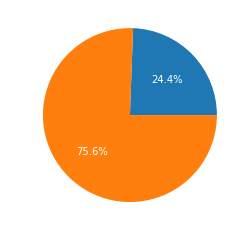

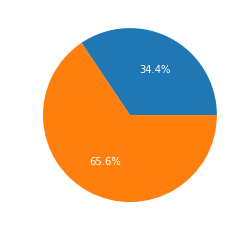

In [466]:
import matplotlib.pyplot as plt

_=[df.loc[i].plot(kind='pie',subplots=True,ax=plt.subplots(1,1)[1], autopct='%1.1f%%') for i in df.index]

<h2>Part 1-b</h2>
1 - Import employee file all columns

In [467]:
import pandas as pd
import numpy as np
df=pd.read_csv('emp_file_CAPSTONE.txt')

2 - Fix the case on the last name

In [468]:
df['ln']=df['ln'].str.capitalize()
df.dept.unique()

array(['hr', 'comp', 'fin', 'proj', 'acc', 'I.T.', 'pub'], dtype=object)

3 - Create a field call Name which has the lastname, First name MI

In [469]:
# this line nukes the I.T. column, recognized too late to fix :()
df['name']=df[['ln','fn','mi']].fillna('').astype('str').agg(' '.join, axis=1)
df

,fn,ln,mi,gender,sg,salary,dept,hiredate,termdate,name
0,Madison,Wilton,W,F,1,$77582,hr,11/22/2015,,Wilton Madison W
1,James,Smith,A,M,1,38136,comp,1/17/2018,,Smith James A
2,John,Johnson,NaN,M,4,107483,fin,6/2/2017,,Johnson John
3,Robert,Williams,W,M,7,3X429110,comp,11/25/2013,,Williams Robert W
4,Michael,Brown,J,M,7,3X646818,proj,1/20/2012,,Brown Michael J
...,...,...,...,...,...,...,...,...,...,...
673,Lawrence,Rubio,NaN,M,6,3X499553,acc,11/14/2011,,Rubio Lawrence
674,Austin,Choi,NaN,M,4,114045,hr,6/10/2017,,Choi Austin
675,Joe,Huffman,G,M,1,33030,comp,3/22/2016,,Huffman Joe G
676,Noah,Boyer,F,M,2,51120,proj,10/8/2017,,Boyer Noah F


4 - Create a alphabetic list of employees by last name, first name (Name)

In [470]:
df.sort_values(['ln','fn','mi'],inplace=True)
new=df
new

,fn,ln,mi,gender,sg,salary,dept,hiredate,termdate,name
645,Raymond,Abbott,NaN,M,7,3X654139,pub,12/28/2002,,Abbott Raymond
665,Keith,Acevedo,A,M,6,3X406173,hr,5/6/2007,,Acevedo Keith A
302,Patricia,Acosta,NaN,F,2,58475,hr,3/5/2018,,Acosta Patricia
42,Benjamin,Adams,NaN,M,2,67712,comp,3/21/2015,,Adams Benjamin
449,Dennis,Adkins,NaN,M,4,111088,I.T.,5/1/2017,,Adkins Dennis
...,...,...,...,...,...,...,...,...,...,...
540,Brandon,Zamora,NaN,M,6,3X410395,proj,10/6/2014,,Zamora Brandon
667,Gerald,Zavala,J,M,5,132100,proj,6/9/2014,,Zavala Gerald J
472,Sean,Zhang,W,M,6,3X534783,proj,1/11/2005,6/6/2006,Zhang Sean W
379,Janice,Zimmerman,NaN,F,5,125626,fin,3/2/2012,,Zimmerman Janice


5 - Create a alphabetic list of employees by last name, first name (Name) for each dept

In [471]:
# thought about making this a dict with keys being depts and names being a literal list...
# This is surprisingly readable and searchable. Assuming the word 'list' in the questions are not meant literally...
df = pd.crosstab(df['dept'], df['name'])
df

name,Abbott Raymond,Acevedo Keith A,Acosta Patricia,Adams Benjamin,Adkins Dennis,Aguilar Shirley J,Aguirre James,Alexander Kimberly F,Ali Zachary,Allen Nicholas,...,Yates Stephen,Yoder Bobby,York Benjamin G,Young Gary G,Yu Nathan J,Zamora Brandon,Zavala Gerald J,Zhang Sean W,Zimmerman Janice,Zuniga Bradley
dept,,,,,,,,,,,,,,,,,,,,,
I.T.,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
acc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
comp,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
fin,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
hr,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
proj,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,1,1,0,0
pub,1,0,0,0,0,0,0,1,0,0,...,0,0,1,1,1,0,0,0,0,0


6 - Create a horizontal bar chart with the number of employees per dept

<AxesSubplot:>

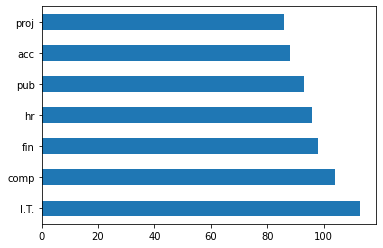

In [472]:
new['dept'].value_counts().plot(kind='barh')

<h2>Part 2 - a</h2>
1 - Remove the NaN from the mi

In [473]:
new['mi']=new['mi'].replace(np.nan, '')
new.dept = new.dept.str.upper()
new

,fn,ln,mi,gender,sg,salary,dept,hiredate,termdate,name
645,Raymond,Abbott,,M,7,3X654139,PUB,12/28/2002,,Abbott Raymond
665,Keith,Acevedo,A,M,6,3X406173,HR,5/6/2007,,Acevedo Keith A
302,Patricia,Acosta,,F,2,58475,HR,3/5/2018,,Acosta Patricia
42,Benjamin,Adams,,M,2,67712,COMP,3/21/2015,,Adams Benjamin
449,Dennis,Adkins,,M,4,111088,I.T.,5/1/2017,,Adkins Dennis
...,...,...,...,...,...,...,...,...,...,...
540,Brandon,Zamora,,M,6,3X410395,PROJ,10/6/2014,,Zamora Brandon
667,Gerald,Zavala,J,M,5,132100,PROJ,6/9/2014,,Zavala Gerald J
472,Sean,Zhang,W,M,6,3X534783,PROJ,1/11/2005,6/6/2006,Zhang Sean W
379,Janice,Zimmerman,,F,5,125626,FIN,3/2/2012,,Zimmerman Janice


2 - Import the dept_CAPSTONE.txt file

In [474]:
import pandas as pd
df=pd.read_csv('dept_CAPSTONE.txt', names=['deptCode','deptName'], header=0)
df=df.replace('\'', '', regex=True)
df.columns=df.columns.str.strip('\'')
df

,deptCode,deptName
0,fin,Finance
1,acc,Acco0unting
2,pub,Public Relations
3,hr,Human resou0rses$
4,comp,Lega@l and Compliance
5,proj,Project Management
6,I.T.,Informa1tion Technology


3 - Make the deptCode all caps

In [475]:
df['deptCode']=df['deptCode'].str.upper()

4 - Remove the non alpha characters in the dept name

In [476]:
df['deptName']=df['deptName'].str.replace(r'[^A-Za-z ]+', '')
df.rename(columns={'deptCode':'dept'}, inplace=True)
df

/var/folders/hl/rnkm2m_d3s92k66lxdhnvbpr0000gn/T/ipykernel_8726/56829498.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['deptName']=df['deptName'].str.replace(r'[^A-Za-z ]+', '')


,dept,deptName
0,FIN,Finance
1,ACC,Accounting
2,PUB,Public Relations
3,HR,Human resourses
4,COMP,Legal and Compliance
5,PROJ,Project Management
6,I.T.,Information Technology


5 - Make the dept name each word initial caps

In [477]:
df['deptName'] = df['deptName'].str.title()
df

,dept,deptName
0,FIN,Finance
1,ACC,Accounting
2,PUB,Public Relations
3,HR,Human Resourses
4,COMP,Legal And Compliance
5,PROJ,Project Management
6,I.T.,Information Technology


6 - Combine the emp_file and the dept_file and join both tables on dept code

In [478]:
import pandas as pd
new = new.merge(df,on='dept',how='inner')
new

,fn,ln,mi,gender,sg,salary,dept,hiredate,termdate,name,deptName
0,Raymond,Abbott,,M,7,3X654139,PUB,12/28/2002,,Abbott Raymond,Public Relations
1,Kimberly,Alexander,F,F,7,3X532531,PUB,3/3/2005,,Alexander Kimberly F,Public Relations
2,Joseph,Ball,A,M,1,38818,PUB,9/6/2017,,Ball Joseph A,Public Relations
3,Logan,Banks,,M,3,84847,PUB,8/12/2016,,Banks Logan,Public Relations
4,Evelyn,Barker,G,F,6,3X408885,PUB,7/30/2014,,Barker Evelyn G,Public Relations
...,...,...,...,...,...,...,...,...,...,...,...
673,Donna,Wade,,F,6,3X410424,ACC,7/9/2010,8/31/2016,Wade Donna,Accounting
674,Russell,Walsh,F,M,2,73281,ACC,12/16/2015,,Walsh Russell F,Accounting
675,Marie,Warren,,F,3,68500,ACC,5/19/2016,,Warren Marie,Accounting
676,Gabriel,Weiss,,M,5,129114,ACC,9/8/2016,10/24/2019,Weiss Gabriel,Accounting


7 - Create a file called ACTIVE_EMPLOYEES_BY_DEPT. Print list of all employees by dept by hire date (Descending order)
	with terminated employees eliminated

In [479]:
# Convert date columns to datetime objects. Coercing errors ignores them and 
# makes empty entries NaT aka 'Not a Time'
new[['hiredate','termdate']]=new[['hiredate','termdate']].apply(pd.to_datetime,errors='coerce')
# Sort the dataframe by the dept then by hiredate 
new.sort_values(['dept','hiredate'],inplace=True)
new[new.termdate.isnull()].to_csv('ACTIVE_EMPLOYEES_BY_DEPT.txt',columns=['name','dept','hiredate'],index=False)

print(pd.read_csv('ACTIVE_EMPLOYEES_BY_DEPT.txt'))

# If you want dataframe output and not resulting csv output uncomment below
# new[['dept','hiredate','name']]

                  name dept    hiredate
0      Salazar Janice   ACC  2003-11-08
1      Benitez Roger F  ACC  2003-11-29
2      Suarez Charles   ACC  2004-04-11
3    Baldwin Natalie G  ACC  2004-12-05
4        Barron Adam G  ACC  2005-04-29
..                 ...  ...         ...
612     Gilbert Ethan   PUB  2018-07-16
613   Franklin Tyler J  PUB  2018-08-03
614    Barrera Jerry P  PUB  2018-09-19
615    Robinson Ryan A  PUB  2018-10-12
616     Rosales Jacob   PUB  2018-10-13

[617 rows x 3 columns]


8 - Create a histogram that shows a count of the number of employees per dept by years employed

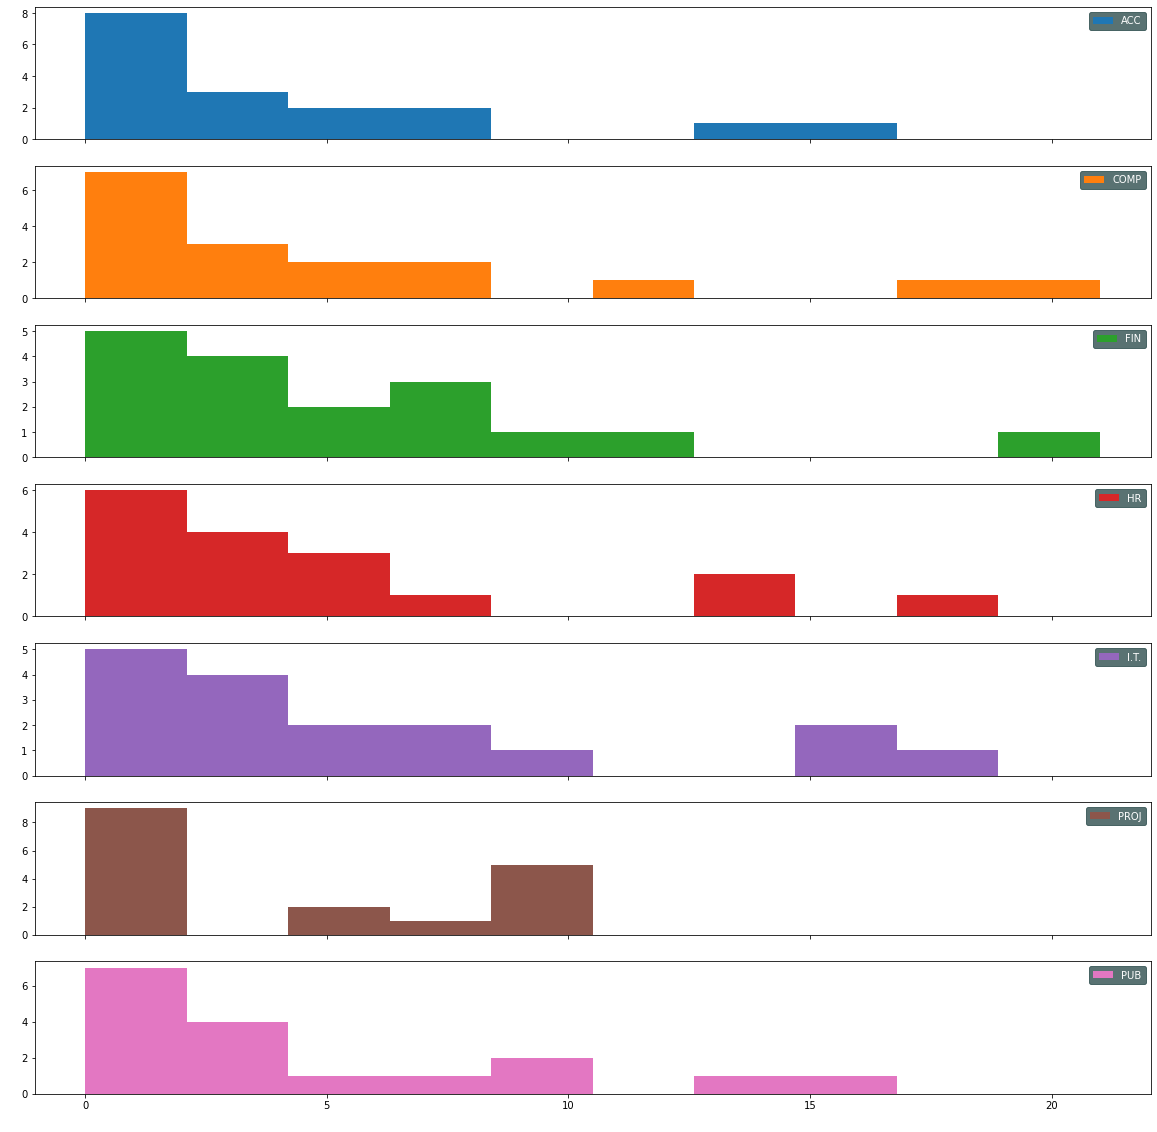

In [480]:
import pandas as pd
# Terminated employees are no longer employees so assuming output file from previous question is
# appropriate
df=pd.read_csv('ACTIVE_EMPLOYEES_BY_DEPT.txt')
df['yearsEmployed'] = pd.Timestamp.now().year-pd.to_datetime(df.hiredate).dt.year
df = pd.crosstab(df['yearsEmployed'],df['dept'])
histo = df.plot(kind='hist',figsize=(20,20), subplots=True).flatten()
[x.legend().get_frame().set_color("darkslategray") for x in histo]
_=[x.set_xlabel('Years Employed') for x in histo]
_=[x.set_ylabel('Number Employees') for x in histo]
#histo #  Uncomment this line if histogram does not display

<h2>Part 2 - b - SALARY ANALYSIS</h2>
NOTE: A normal distribution has the following attributes:<br>
68% within 1 standard deviation, 95% within 2 STD, 99% within 3 STD<br>
1 - Decode the salaries column

In [481]:
# The number in front of the X in the encoded salary indicates what index within
#    the scale array to use for the decoded digit in a given salary.
# The number 3 in front of the X means the decoded number is the -3rd index from the original

import pandas as pd

df = pd.read_csv('ACTIVE_EMPLOYEES_BY_DEPT.csv')

def decoder(salary):
    scale = [0,1,2,3,4,5,6,7,8,9]
    # get rid of dollar sign
    salary = salary.replace('$','')
    # Proceed only if salary is encoded
    if 'X' not in salary: return int(salary)
    # make salary mutable
    salary = list(salary)
    # Remove the 'X'
    salary.pop(1)
    # Keep first digit as the scale 'index adjuster'
    decode_key = int(salary.pop(0))
    # iterate the salary digits
    for x in range(len(salary)):
        # find each digits index in the scale list, adjust index by decode key
        #   and set that salary digit to the decoded value
        salary[x]=str(scale[scale.index(int(salary[x]))-decode_key])
    # return decoded salary
    return int(''.join(salary))
# Apply the above function to the encoded salaries and save it to a new column
df['decoded'] = df.salary.apply(decoder)
decoded_salaries = df
df.deptCode.unique()

array(['PUB', 'PROJ', 'HR', 'FIN', 'COMP', 'ACC'], dtype=object)

2 - Create a histogram of all salaries in deciles

<AxesSubplot:xlabel='Salary', ylabel='Frequency'>

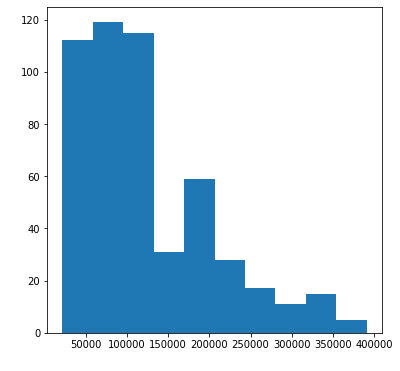

In [482]:
histo = df['decoded'].plot(kind='hist',figsize=(6,6))
histo.set_xlabel('Salary')
histo.set_ylabel('Frequency')
histo

3 - Calculate the mean, mode, median, and standard deviation of the salaries

In [483]:
print(f'Mean:\n{df.decoded.mean()}\n')
# print(f'Modes:\n{df.decoded.mode()}\n')
print('NO MODE')
print(f'Median:\n{df.decoded.median()}\n')
print(f'Standard Deviation:\n{df.decoded.std()}')


Mean:
123370.087890625

NO MODE
Median:
103303.0

Standard Deviation:
80006.15767222963


4 - Is the salary distribution a normal distribution?

NO


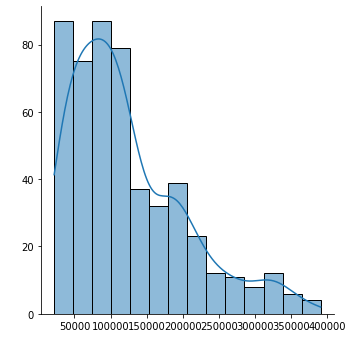

In [484]:
import seaborn as sb
sb.displot(df.decoded,kde=True)
print('NO')

5 - Calculate the mean, mode, median, and standard deviation of the salaries of men

In [485]:
male_salaries = df.loc[df.gender=='M']
print(f'Mean:\n{male_salaries.decoded.mean()}\n')
# print(f'Modes:\n{male_salaries.decoded.mode()}\n')
print('NO MODE')
print(f'Median:\n{male_salaries.decoded.median()}\n')
print(f'Standard Deviation:\n{male_salaries.decoded.std()}')

Mean:
124506.92917847025

NO MODE
Median:
103140.0

Standard Deviation:
82939.05426075381


6 - Calculate the mean, mode, median, and standard deviation of the salaries of women

In [486]:
female_salaries = df.loc[df.gender=='F']
print(f'Mean:\n{female_salaries.decoded.mean()}\n')
# print(f'Modes:\n{female_salaries.decoded.mode()}\n')
print('No Mode')
print(f'Median:\n{female_salaries.decoded.median()}\n')
print(f'Standard Deviation:\n{female_salaries.decoded.std()}')

Mean:
120846.1572327044

No Mode
Median:
104220.0

Standard Deviation:
73263.27842826446


7 - Is the standard deviation, mean, mode, median higher for men? Calulate the % difference

In [487]:
print(f'Male mean salary higher by {round((1-female_salaries.decoded.mean()/male_salaries.decoded.mean())*100,2)}%')
# print(f'Male mode salary higher by\n{round((1-female_salaries.decoded.mode()/male_salaries.decoded.mode())*100,2)}')
print('NO MODE, uncomment above to show proof if required')
print(f'Female median salary higher by {round((female_salaries.decoded.median()/male_salaries.decoded.median()-1)*100,2)}%')
print(f'Male stdDev salary higher by {round((1-female_salaries.decoded.std()/male_salaries.decoded.std())*100,2)}%')

Male mean salary higher by 2.94%
NO MODE, uncomment above to show proof if required
Female median salary higher by 1.05%
Male stdDev salary higher by 11.67%


8 - Write up- Do you think there is salary bias?

In [488]:
print("""The mean salary for men is ~$3,000 higher for men than it is for women. With the womens standard deviation being lower
this may indicate a no bias, or a bias favoring the men depending on whether the outlier salaries causing the mens higher standard
deviation are above or below the average.""")

The mean salary for men is ~$3,000 higher for men than it is for women. With the womens standard deviation being lower
this may indicate a no bias, or a bias favoring the men depending on whether the outlier salaries causing the mens higher standard
deviation are above or below the average.


<h2>Part 2 - c</h2>
The salary grades of 5 - 7 are considered executive salary grades - Exempt or EXECUTIVE<br>
1 - create a new column called 'Status' Label each employee record in alpha order by name as EXEMPT or NON-EXEMPT

In [489]:
df['Status'] = ''
df['Status'].loc[(df['sg'] >= 5)],df['Status'].loc[(df['sg'] < 5)] = 'EXEMPT','NON-EXEMPT'
df.deptCode.unique()

/var/folders/hl/rnkm2m_d3s92k66lxdhnvbpr0000gn/T/ipykernel_8726/4136733616.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Status'].loc[(df['sg'] >= 5)],df['Status'].loc[(df['sg'] < 5)] = 'EXEMPT','NON-EXEMPT'


array(['PUB', 'PROJ', 'HR', 'FIN', 'COMP', 'ACC'], dtype=object)

2 - Calculate the mean, mode, median, and standard deviation of the salaries of each salary grade

In [490]:
sg_stats=[df.decoded.loc[df.sg == grade].rename(grade,inplace=True) for grade in df.sg.unique()]

for grade in sg_stats:
    print(f'\n-----------\nSalary Grade: {grade.name}')
    print(f'Mean:\n{grade.mean()}\n')
    # print(f'Modes:\n{grade.mode()}\n')
    print('NO MODE. Uncomment above if proof is needed\n')
    print(f'Median:\n{grade.median()}\n')
    print(f'Standard Deviation:\n{grade.std()}')


-----------
Salary Grade: 2
Mean:
53987.464788732395

NO MODE. Uncomment above if proof is needed

Median:
52082.0

Standard Deviation:
8423.965311336437

-----------
Salary Grade: 3
Mean:
79075.05

NO MODE. Uncomment above if proof is needed

Median:
78271.0

Standard Deviation:
9517.893026734142

-----------
Salary Grade: 1
Mean:
32864.584615384614

NO MODE. Uncomment above if proof is needed

Median:
32513.0

Standard Deviation:
8053.594853177965

-----------
Salary Grade: 5
Mean:
129009.02985074627

NO MODE. Uncomment above if proof is needed

Median:
129655.0

Standard Deviation:
11073.768992355996

-----------
Salary Grade: 4
Mean:
104077.31325301205

NO MODE. Uncomment above if proof is needed

Median:
103988.0

Standard Deviation:
9745.557305426857

-----------
Salary Grade: 7
Mean:
272029.08974358975

NO MODE. Uncomment above if proof is needed

Median:
262586.0

Standard Deviation:
51828.11693039101

-----------
Salary Grade: 6
Mean:
181910.0294117647

NO MODE. Uncomment abo

3 - Calculate the mean, mode, median, and standard deviation of the salaries of EXEMPT employees

In [491]:
ex=df.decoded.loc[df.Status == 'EXEMPT']
print(f'Mean:\n{ex.mean()}\n')
# print(f'Modes:\n{ex.mode()}\n')
print('NO MODE. Uncomment above if proof is needed\n')
print(f'Median:\n{ex.median()}\n')
print(f'Standard Deviation:\n{ex.std()}')

Mean:
198271.15492957746

NO MODE. Uncomment above if proof is needed

Median:
185599.0

Standard Deviation:
68328.95116556568


4 - Calculate the mean, mode, median, and standard deviation of the salaries of NON-EXEMPT employees

In [492]:
ex=df.decoded.loc[df.Status == 'NON-EXEMPT']
print(f'Mean:\n{ex.mean()}\n')
# print(f'Modes:\n{ex.mode()}\n')
print('NO MODE. Uncomment above if proof is needed\n')
print(f'Median:\n{ex.median()}\n')
print(f'Standard Deviation:\n{ex.std()}')

Mean:
70012.47157190635

NO MODE. Uncomment above if proof is needed

Median:
70288.0

Standard Deviation:
28074.595214500987


5 - Create pie charts of the employee status of EXEMPT count by gender and NON-EXEMPT count by gender

Status,EXEMPT,NON-EXEMPT
gender,,
F,77,82
M,136,217


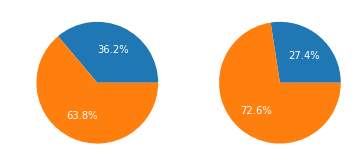

In [493]:
temp = pd.crosstab(df['gender'],df['Status'])
temp.plot(kind='pie',subplots=True, autopct='%1.1f%%',legend=False)
temp

6 - Create scatter plots of salary grade by mean salary

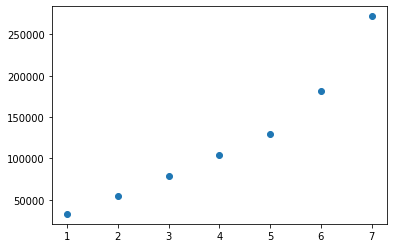

In [494]:
# RIP this code. Cause of death: Question interpretation complications
# df.plot(kind='scatter',x='sg',y='decoded').set_xlabel([df.decoded.loc[df.sg==x].mean() for x in df.sg.unique()])
plt.scatter([x for x in df.sg.unique()],[df.decoded.loc[df.sg==x].mean() for x in df.sg.unique()])

7 - Create a scatter plots of salary grade by mean salary for men

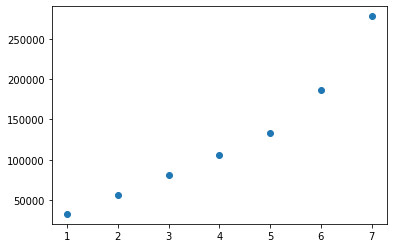

In [495]:
men = df.loc[df.gender=='M']
plt.scatter([x for x in men.sg.unique()],[men.decoded.loc[men.sg==x].mean() for x in men.sg.unique()])

8 - Create a scatter plots of salary grade by mean salary for women

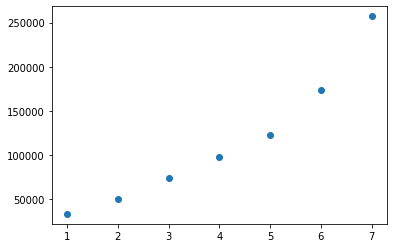

In [496]:
women = df.loc[df.gender=='F']
plt.scatter([x for x in women.sg.unique()],[women.decoded.loc[women.sg==x].mean() for x in women.sg.unique()])

9 - Create a horizontal bar chart of EXEMPT employees by mean salary for men and women (1 chart)

<BarContainer object of 2 artists>

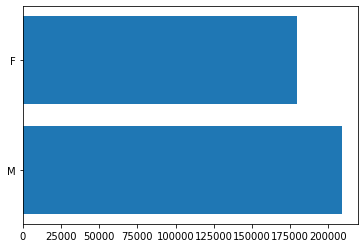

In [497]:
ex = df.loc[df.Status=='EXEMPT']
plt.barh([x for x in ex.gender.unique()],[ex.decoded.loc[ex.gender==x].mean() for x in ex.gender.unique()])

10- Create a horizontal bar chart of NON-EXEMPT employees by mean salary for men and women (1 chart)

<BarContainer object of 2 artists>

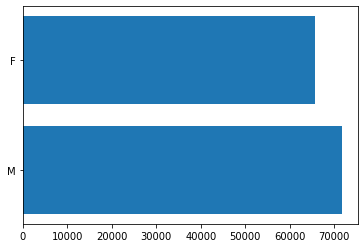

In [498]:
ex = df.loc[df.Status!='EXEMPT']
plt.barh([x for x in ex.gender.unique()],[ex.decoded.loc[ex.gender==x].mean() for x in ex.gender.unique()])

<h2>Part 3a - Create employee Id</h2>
To construct the employee id for everyone use the following formula<br>
First 3 letters of the last name + first 3 letters of the last name + a random 2 digit number from (1 - 99)<br>
For example the employee name is Kevin Smith id = 'SMIKEV07'<br>
In the case of people with the same last name and first name generate a new number<br>
No duplication<br>
1 - List all employees in employee id order<br>

In [499]:
# fn[:3]+ln[:3]+str(random.randint(1-1000))
from random import randint

new['code'] = [new.loc[row].fn[:3]+new.loc[row].ln[:3]+str(randint(100,1000)) for row in new.index]
new

,fn,ln,mi,gender,sg,salary,dept,hiredate,termdate,name,deptName,code
594,Samuel,Ballard,,M,6,3X422137,ACC,2002-12-03,2019-11-15,Ballard Samuel,Accounting,SamBal423
606,Dennis,Chase,,M,7,3X509923,ACC,2002-12-31,2014-05-23,Chase Dennis,Accounting,DenCha552
661,Janice,Salazar,,F,7,3X679195,ACC,2003-11-08,NaT,Salazar Janice,Accounting,JanSal605
597,Roger,Benitez,F,M,7,3X662857,ACC,2003-11-29,NaT,Benitez Roger F,Accounting,RogBen201
666,Charles,Suarez,,M,7,3X655783,ACC,2004-04-11,NaT,Suarez Charles,Accounting,ChaSua787
...,...,...,...,...,...,...,...,...,...,...,...,...
29,Ethan,Gilbert,,M,3,79105,PUB,2018-07-16,NaT,Gilbert Ethan,Public Relations,EthGil562
27,Tyler,Franklin,J,M,3,86583,PUB,2018-08-03,NaT,Franklin Tyler J,Public Relations,TylFra978
5,Jerry,Barrera,P,M,3,75908,PUB,2018-09-19,NaT,Barrera Jerry P,Public Relations,JerBar282
63,Ryan,Robinson,A,M,3,93952,PUB,2018-10-12,NaT,Robinson Ryan A,Public Relations,RyaRob611


<h2>Part 3b1-3b3 -Raises</h2>
1 - Import the file raises_CAPSTONE.txt<br>
2 - The rules for giving a raise are in the file but be careful of the order that your run the raise<br>
3 - Based on each employees salary calculate 2 fields 'Raise_Amount' and 'New_Salary'<br>

In [500]:
raises = pd.read_csv('raises_CAPSTONE.txt')
raises.raise_amount = raises.raise_amount.apply(lambda x: float(x.replace('%','').replace('\'',''))*.01)
raise_list = raises.raise_amount.to_list()


def find_raise(length_employed:int):
    for num in range(len(raise_list)):
        try:
            if length_employed >= raises.iloc[num].years and length_employed < raises.iloc[num+1].years:
                return raise_list[num] 
        except:
            return raise_list[num]

new = decoded_salaries
new['yearsEmployed'] = pd.Timestamp.now().year-pd.to_datetime(new.hiredate).dt.year
new['Raise_Percent']=new.yearsEmployed.apply(find_raise)
new['Raise_Amount']=new.decoded*new.Raise_Percent
new['New_Salary']=new.decoded+new.Raise_Amount

print('Output for 3B1-3B3:')
new


Output for 3B1-3B3:


,fn,ln,mi,gender,sg,salary,dept,hiredate,termdate,deptCode,deptName,decoded,Status,yearsEmployed,Raise_Percent,Raise_Amount,New_Salary
0,Jacob,ROSALES,NaN,M,2,54720,PUB,2018-10-13,NaN,PUB,Public Relations,54720,NON-EXEMPT,4,0.04,2188.80,56908.80
1,Ryan,ROBINSON,A,M,3,93952,PUB,2018-10-12,NaN,PUB,Public Relations,93952,NON-EXEMPT,4,0.04,3758.08,97710.08
2,Jerry,BARRERA,P,M,3,75908,PUB,2018-09-19,NaN,PUB,Public Relations,75908,NON-EXEMPT,4,0.04,3036.32,78944.32
3,Tyler,FRANKLIN,J,M,3,86583,PUB,2018-08-03,NaN,PUB,Public Relations,86583,NON-EXEMPT,4,0.04,3463.32,90046.32
4,Ethan,GILBERT,NaN,M,3,79105,PUB,2018-07-16,NaN,PUB,Public Relations,79105,NON-EXEMPT,4,0.04,3164.20,82269.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,Adam,BARRON,G,M,7,3X666950,ACC,2005-04-29,NaN,ACC,Accounting,333627,EXEMPT,17,0.10,33362.70,366989.70
508,Natalie,BALDWIN,G,F,7,3X558595,ACC,2004-12-05,NaN,ACC,Accounting,225262,EXEMPT,18,0.10,22526.20,247788.20
509,Charles,SUAREZ,NaN,M,7,3X655783,ACC,2004-04-11,NaN,ACC,Accounting,322450,EXEMPT,18,0.10,32245.00,354695.00
510,Roger,BENITEZ,F,M,7,3X662857,ACC,2003-11-29,NaN,ACC,Accounting,339524,EXEMPT,19,0.10,33952.40,373476.40


4 - Calculate the total salary for each dept<br>

In [501]:
salary_by_dept = pd.DataFrame([(new.loc[new.deptCode == code].New_Salary.sum(),code) for code in new.deptCode.unique()])
salary_by_dept.columns=['Total_Salary','Dept']
salary_by_dept.reset_index(drop=True, inplace=True)

5 - Chart the total salary for each dept in 1 bar chart<br>

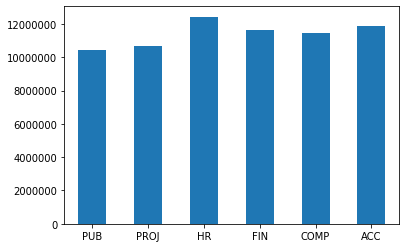

array([2, 3, 1, 5, 4, 7, 6])

In [502]:
salary_by_dept.plot(kind='bar',rot=0,legend=False)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(salary_by_dept.index,list(salary_by_dept.Dept))
plt.show()
df.sg.unique()

6 - Create a pie chart that shows the percentage that each dept has of the total money allocated for raises<br>

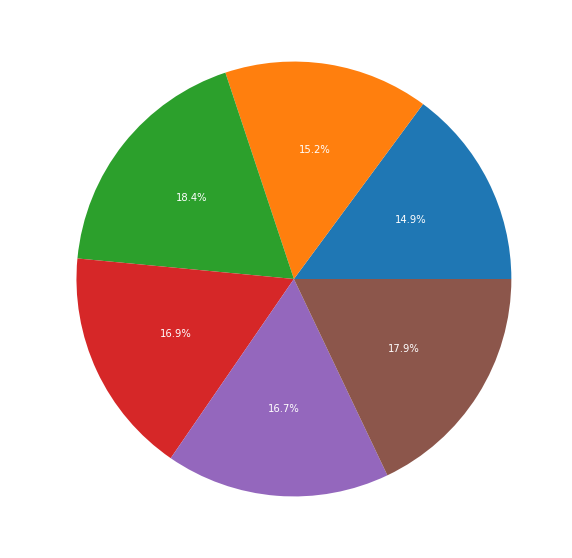

,Raise_amount,Dept
Dept,,
PUB,801190.24,PUB
PROJ,820038.72,PROJ
HR,990228.34,HR
FIN,911160.96,FIN
COMP,897221.48,COMP
ACC,965276.36,ACC


In [503]:
salary_by_dept = pd.DataFrame([(new.loc[new.deptCode == code].Raise_Amount.sum(),code) for code in new.deptCode.unique()])
salary_by_dept.columns=['Raise_amount','Dept']
salary_by_dept.index = salary_by_dept.Dept
salary_by_dept.plot(kind='pie', y='Raise_amount', autopct='%1.1f%%',figsize=(10,10),legend=False)
plt.show()
salary_by_dept


7 - Create a pie chart to show the percent of men vs women for the raise money allocated<br>


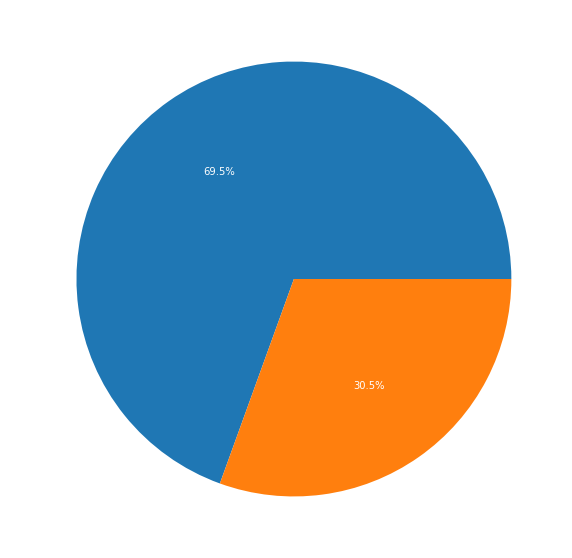

In [504]:
salary_by_gender = pd.DataFrame([(new.loc[new.gender == code].Raise_Amount.sum(),code) for code in new.gender.unique()])
salary_by_gender.columns=['Raise_amount','gender']
salary_by_gender.index = salary_by_gender.gender
salary_by_gender.plot(kind='pie', y='Raise_amount', autopct='%1.1f%%',figsize=(10,10),legend=False)
plt.show()

8- Create a pie chart to show the percent of men vs women for the raise money allocated by dept.

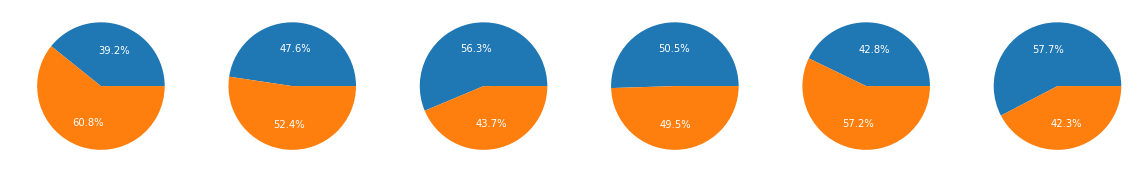

In [505]:
test = new.pivot_table(index='gender', columns='dept', values='Raise_Amount')
test.plot(kind='pie', subplots=True, autopct='%1.1f%%',figsize=(20,20),legend=False)
plt.show()

9 - Create a dataframe for promotions.  If the persons salary excedes the salary max for their salary grade. create a column<br>
called 'Promotion' and add the string 'PROMOTION DUE' otherwise leave blank<br>

In [506]:
pay_grades = pd.read_csv('salary_grade_CAPSTONE.txt')
pay_grades.set_axis(['grade','low','high'], axis=1, inplace=True)


pay_grades = pay_grades[['low','high']].astype(str)
pay_grades[['low','high']] = pay_grades[['low','high']].apply(lambda x: x.str.replace('$','').replace('nan','0').astype(int))
pay_grades.index+=1

new['Promotion'] = ''
def promotion_checker(row:pd.Series):
    for i in pay_grades.index:
        if row.sg == i and row.New_Salary >= pay_grades.iloc[i-1].high:
            return 'PROMOTION DUE'
new.Promotion = new.apply(promotion_checker,axis=1)
new

/var/folders/hl/rnkm2m_d3s92k66lxdhnvbpr0000gn/T/ipykernel_8726/2585091165.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  pay_grades[['low','high']] = pay_grades[['low','high']].apply(lambda x: x.str.replace('$','').replace('nan','0').astype(int))


,fn,ln,mi,gender,sg,salary,dept,hiredate,termdate,deptCode,deptName,decoded,Status,yearsEmployed,Raise_Percent,Raise_Amount,New_Salary,Promotion
0,Jacob,ROSALES,NaN,M,2,54720,PUB,2018-10-13,NaN,PUB,Public Relations,54720,NON-EXEMPT,4,0.04,2188.80,56908.80,None
1,Ryan,ROBINSON,A,M,3,93952,PUB,2018-10-12,NaN,PUB,Public Relations,93952,NON-EXEMPT,4,0.04,3758.08,97710.08,PROMOTION DUE
2,Jerry,BARRERA,P,M,3,75908,PUB,2018-09-19,NaN,PUB,Public Relations,75908,NON-EXEMPT,4,0.04,3036.32,78944.32,None
3,Tyler,FRANKLIN,J,M,3,86583,PUB,2018-08-03,NaN,PUB,Public Relations,86583,NON-EXEMPT,4,0.04,3463.32,90046.32,PROMOTION DUE
4,Ethan,GILBERT,NaN,M,3,79105,PUB,2018-07-16,NaN,PUB,Public Relations,79105,NON-EXEMPT,4,0.04,3164.20,82269.20,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,Adam,BARRON,G,M,7,3X666950,ACC,2005-04-29,NaN,ACC,Accounting,333627,EXEMPT,17,0.10,33362.70,366989.70,PROMOTION DUE
508,Natalie,BALDWIN,G,F,7,3X558595,ACC,2004-12-05,NaN,ACC,Accounting,225262,EXEMPT,18,0.10,22526.20,247788.20,PROMOTION DUE
509,Charles,SUAREZ,NaN,M,7,3X655783,ACC,2004-04-11,NaN,ACC,Accounting,322450,EXEMPT,18,0.10,32245.00,354695.00,PROMOTION DUE
510,Roger,BENITEZ,F,M,7,3X662857,ACC,2003-11-29,NaN,ACC,Accounting,339524,EXEMPT,19,0.10,33952.40,373476.40,PROMOTION DUE


<h2>Part 4 - Analysis</h2>
1 - Write about any conclusions you drew from the data.
2 - Are there any additional charts or analysis you could include to bolster your conclusions

1)
The only potential descrimination that I can see is a large gender gap among the 'Exempt' employees and   'Raise Amounts'. However I do not see any relevant statistics that could be used to dertimine the cause, being that raises are giving due to time with the company and no other factors.

2)
Checking the retention rate for each department, and pay-grade may show a bias in the retention rate explaining the above desparity. Requests for additional analysis must be submitted to auditing company for approvel. The employee providing the above charts and analysis is no longer with the company and is not avaliable for contact.

This notebook is part of a course at www.codeimmersives.com called Data Science. If you accessed this notebook outside the course, you can get more information about this course online by clicking here.

<hr>

Copyright &copy; 2021  Code Immersives